In [1]:
# Import Data Manipulation Libaries
import pandas as pd
import numpy as np

# Import Data visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter warning Libraries
import warnings 
warnings.filterwarnings('ignore')

# Import scikit-learn libraries
from sklearn.preprocessing import RobustScaler , MinMaxScaler , LabelEncoder ,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

# Import Machine Learning Model Libaries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Import Neccessary libraries
import optuna
import researchpy


In [2]:


filepath = 'https://raw.githubusercontent.com/rushikeshpatil-123/heartdisese_predictionmodel/refs/heads/main/data/raw/heart.csv'

target = 'target'

numerical_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

categorical_columns = []
df = pd.read_csv(filepath)
df.head()

# Segregate Numerical and Categorical Columns

numerical_col = df.select_dtypes(exclude = "object").columns
categorical_col = df.select_dtypes(include = "object").columns

In [3]:
import researchpy as rp 

rp.codebook(df)

Variable: age    Data Type: int64 

 Number of Obs.: 303 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 41 

 Range: [29, 77] 
 Mean: 54.37 
 Standard Deviation: 9.08 
 Mode: 58 
 10th Percentile: 42.0 
 25th Percentile: 47.5 
 50th Percentile: 55.0 
 75th Percentile: 61.0 
 90th Percentile: 66.0 





Variable: sex    Data Type: int64 

 Number of Obs.: 303 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 2 

 Range: [0, 1] 
 Mean: 0.68 
 Standard Deviation: 0.47 
 Mode: 1 
 10th Percentile: 0.0 
 25th Percentile: 0.0 
 50th Percentile: 1.0 
 75th Percentile: 1.0 
 90th Percentile: 1.0 





Variable: cp    Data Type: int64 

 Number of Obs.: 303 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 4 

 Range: [0, 3] 
 Mean: 0.97 
 Standard Deviation: 1.03 
 Mode: 0 
 10th Percentile: 0.0 
 25th Percentile: 0.0 
 50th Percentile: 1.0 
 75th Percentile: 2.0 
 90th Percentile: 2.0 





Variable: trestb

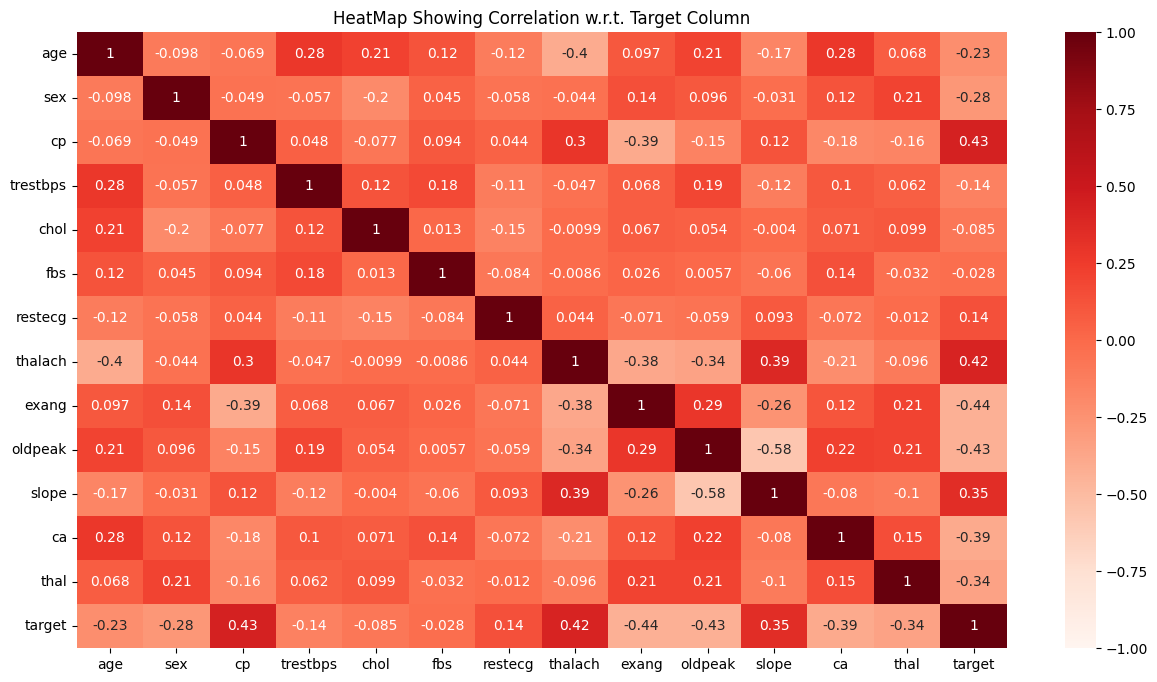

In [6]:
# Checking Correlation using HeatMap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True,vmin= -1,vmax = 1,center=0,cmap="Reds")
plt.title("HeatMap Showing Correlation w.r.t. Target Column")
plt.show()

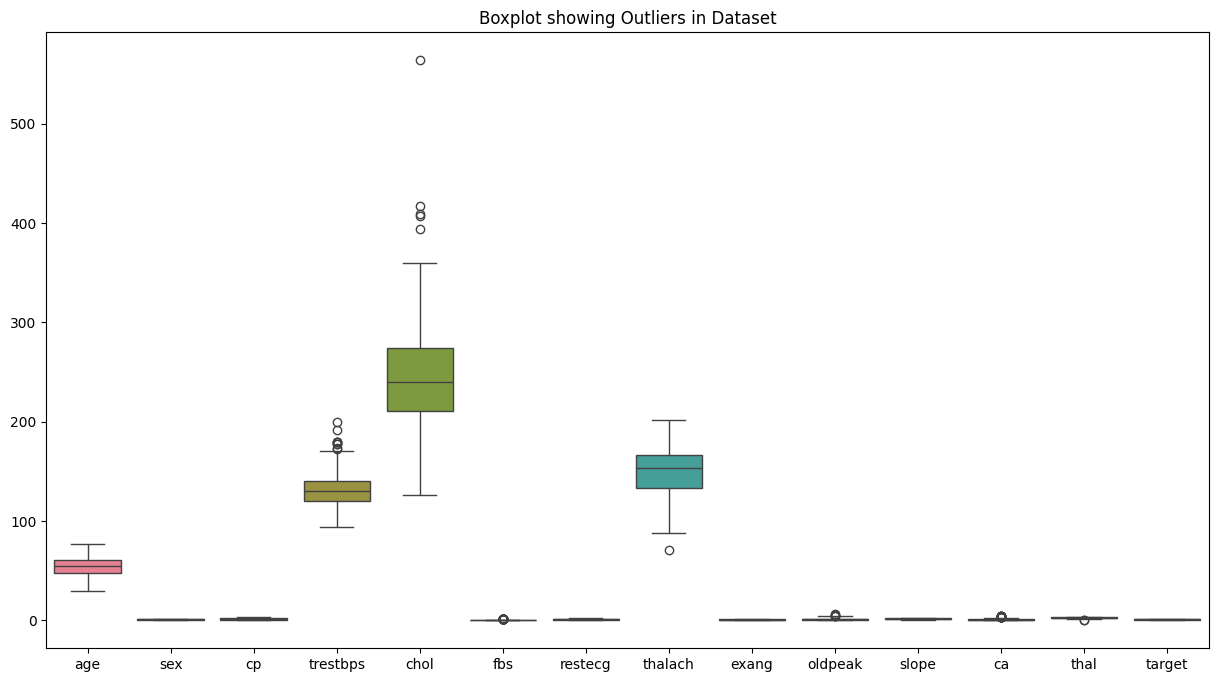

In [9]:
# Checking Outliers in Data 

"""
Rule:
1. if the dataset columns shows normally distribution then use Z test to evaluate outliers
2. if the dataset columns shows non normally distributed then use IQR to evaluate outliers since, IQR technique is Robust technique
3. if outliers in dataset is found to be less than 5% then it is considerd as tolerable limit
4. if the outliers in  dataset is found between 5% to 10% use IQR Capping Technique or use Winsor Method.
5. if the Outliers in dataset is more than 10% then better to using triming technique.
"""
plt.figure(figsize=(15,8))
sns.boxplot(df[numerical_col])
plt.title("Boxplot showing Outliers in Dataset")
plt.show()

In [15]:
filepath = 'https://raw.githubusercontent.com/rushikeshpatil-123/heartdisese_predictionmodel/refs/heads/main/data/raw/heart.csv'

#function definition

#Step 1 : data ingestion

def data_ingestion():
  return pd.read_csv(filepath)



#Step 2 : descriptive stats
def descriptive_stats(data):

    numerical_col = data.select_dtypes(exclude='object').columns
    categorical_col = data.select_dtypes(include='object').columns

    from collections import OrderedDict

    num_stats_list = []
    cat_stats_list = []

    # Numerical Features
    for col in numerical_col:

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Count outliers for this column only
        outlier_count = (
            (data[col] < lower_limit) | (data[col] > upper_limit)
        ).sum()

        stats = OrderedDict({
            "Feature": col,
            "Mean": data[col].mean(),
            "Median": data[col].median(),
            "Standard Deviation": data[col].std(),
            "Minimum": data[col].min(),
            "Maximum": data[col].max(),
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Limit": lower_limit,
            "Upper Limit": upper_limit,
            "Outlier Count": outlier_count,
            "Skewness": data[col].skew(),
            "Kurtosis": data[col].kurt(),
            "Missing Values": data[col].isnull().sum()
        })

        num_stats_list.append(stats)

    numerical_stats_report = pd.DataFrame(num_stats_list)

    # -------------------------
    # Categorical Features
    # -------------------------
    for col in categorical_col:
        cat_stats = OrderedDict({
            "Feature": col,
            "Unique Values": data[col].nunique(),
            "Mode": data[col].mode()[0],
            "Missing Values": data[col].isnull().sum(),
            "Value Counts": data[col].value_counts().to_dict()
        })

        cat_stats_list.append(cat_stats)

    categorical_stats_report = pd.DataFrame(cat_stats_list)

    # -------------------------
    # Dataset Info
    # -------------------------
    dataset_info = pd.DataFrame({
        "Feature": data.columns,
        "Dtype": data.dtypes.values,
        "Missing Values": data.isnull().sum().values,
        "Unique Values": data.nunique().values
    })

    return numerical_stats_report, categorical_stats_report, dataset_info


In [ ]:
# Function Calling
data = data_ingestion()

numerical_stats_report, categorical_stats_report, dataset_info = descriptive_stats(data)

In [17]:
numerical_stats_report

,Feature,Mean,Median,Standard Deviation,Minimum,Maximum,Q1,Q3,IQR,Lower Limit,Upper Limit,Outlier Count,Skewness,Kurtosis,Missing Values
0,age,54.366337,55.0,9.082101,29.0,77.0,47.5,61.0,13.5,27.25,81.25,0,-0.202463,-0.542167,0
1,sex,0.683168,1.0,0.466011,0.0,1.0,0.0,1.0,1.0,-1.50,2.50,0,-0.791335,-1.382961,0
2,cp,0.966997,1.0,1.032052,0.0,3.0,0.0,2.0,2.0,-3.00,5.00,0,0.484732,-1.193071,0
3,trestbps,131.623762,130.0,17.538143,94.0,200.0,120.0,140.0,20.0,90.00,170.00,9,0.713768,0.929054,0
4,chol,246.264026,240.0,51.830751,126.0,564.0,211.0,274.5,63.5,115.75,369.75,5,1.143401,4.505423,0
5,fbs,0.148515,0.0,0.356198,0.0,1.0,0.0,0.0,0.0,0.00,0.00,45,1.986652,1.959678,0
6,restecg,0.528053,1.0,0.525860,0.0,2.0,0.0,1.0,1.0,-1.50,2.50,0,0.162522,-1.362673,0
7,thalach,149.646865,153.0,22.905161,71.0,202.0,133.5,166.0,32.5,84.75,214.75,1,-0.537410,-0.061970,0
8,exang,0.326733,0.0,0.469794,0.0,1.0,0.0,1.0,1.0,-1.50,2.50,0,0.742532,-1.458317,0
9,oldpeak,1.039604,0.8,1.161075,0.0,6.2,0.0,1.6,1.6,-2.40,4.00,5,1.269720,1.575813,0


In [33]:
X = df.drop(columns=['target','fbs','restecg','slope'],axis=1)
y = df['target']


X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state=0)


# Scaling Technique 

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Model Building


# randomforest
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test,y_pred)

print(rf.feature_importances_)
df.columns


[0.08290799 0.04823299 0.13019505 0.07881561 0.08338942 0.14130942
 0.06121441 0.14187147 0.11578324 0.11628041]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

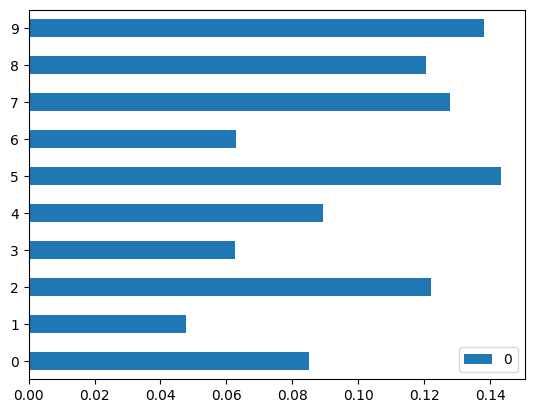

In [30]:
d = pd.DataFrame(rf.feature_importances_)
d.plot(kind = 'barh')

In [31]:
# Use RandomForest with GridSearch CV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Build Model With RandomForest

rf = RandomForestClassifier(random_state = 42)

# Hyperparameter grid

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
}

# GridSearchCV
grid = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1,
    verbose=1
)
# Fit On training data
grid.fit(X_train, y_train)

# Print Best Parameters
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:  {'max_depth': None, 'n_estimators': 100}
Best score:  0.8301218161683277
